# Data Analysis and Visualisation &mdash; Lab 02

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams.update({
    "font.size": 12,
})

## Problem 1

In [ ]:
import pandas as pd

statcounter_ww = pd.read_csv("../data/linux-adoption/StatCounter_Worldwide.csv", parse_dates=["Date"])
statcounter_vn = pd.read_csv("../data/linux-adoption/StatCounter_Viet+Nam.csv", parse_dates=["Date"])

In [ ]:
statcounter_ww.plot.line(x="Date", marker="o", figsize=(20, 12))

plt.title("Desktop OS market share % from 2023-01 to 2025-10 (Source: StatCounter)")

plt.xlabel("OS")
plt.ylabel("Market share %")

plt.show()

In [ ]:
distrowatch_phr = pd.read_csv("../data/linux-adoption/DistroWatch_HPD.csv")

In [ ]:
distrowatch_phr \
    .pivot_table(
        index="distro",
        columns="month_range",
        values="hits_per_day",
        aggfunc="sum",
    ).reset_index() \
    .assign(avg_hpd=lambda d: d.drop(columns="distro").mean(axis=1)) \
    .sort_values("avg_hpd", ascending=False).drop(columns="avg_hpd").set_index("distro").head(50) \
    .plot.bar(stacked=True, width=0.8, figsize=(20, 8))

plt.title("Linux distros ranking by page hits per day (Source: DistroWatch)")

plt.xlabel("Distros")
plt.ylabel("Hits per day")

plt.legend(title="Month range")

plt.show()

## Problem 2

In [125]:
coffee_chains = ["Highlands+Coffee", "Phuc+Long+Coffee", "Starbucks"]
cities = ["Hanoi", "Ho+Chi+Minh+City"]

dfs = {}

for chain in coffee_chains:
    for city in cities:
        key = f"{chain}_{city}"
        path = f"../data/coffee-chains/{chain}_{city}.csv"

        df = pd.read_csv(path)

        group_cols = [col for col in df.columns if col != "info"]
        df = df.groupby(group_cols, as_index=False).first()

        dfs[key] = df

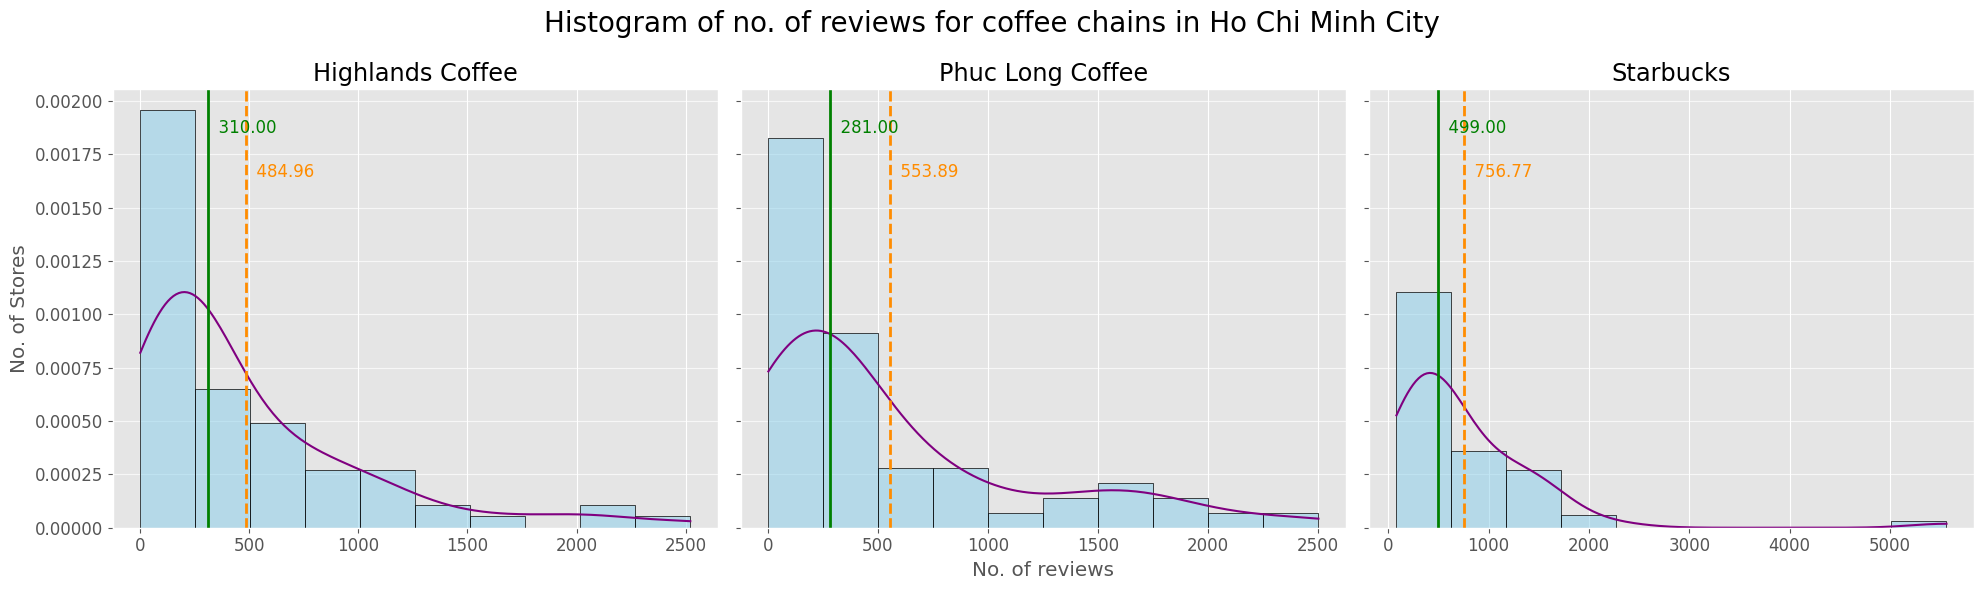

In [146]:
city = "Ho+Chi+Minh+City"

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for i, chain in enumerate(coffee_chains):
    df = dfs[f"{chain}_{city}"]

    num_of_reviews_mean = df["num_of_reviews"].mean()
    num_of_reviews_median = df["num_of_reviews"].median()

    sns.histplot(df["num_of_reviews"], bins=10, kde=True, stat="density", color="skyblue", edgecolor="black", ax=axes[i])

    axes[i].axvline(num_of_reviews_mean, color="darkorange", linestyle="dashed", linewidth=2)
    axes[i].text(num_of_reviews_mean, axes[i].get_ylim()[1] * 0.8, f"  {num_of_reviews_mean:.2f}", color="darkorange")

    axes[i].axvline(num_of_reviews_median, color="green",  linewidth=2)
    axes[i].text(num_of_reviews_median, axes[i].get_ylim()[1] * 0.9, f"  {num_of_reviews_median:.2f}", color="green")

    axes[i].grid(axis="y", alpha=0.7)
    axes[i].lines[0].set_color("purple")

    axes[i].set_title(chain.replace("+", " "))

    axes[i].set_xlabel("No. of reviews" if i == 1 else "")
    if i == 0:
        axes[i].set_ylabel("No. of Stores")

fig.suptitle("Histogram of no. of reviews for coffee chains in Ho Chi Minh City", fontsize=20)
plt.tight_layout()

plt.show()

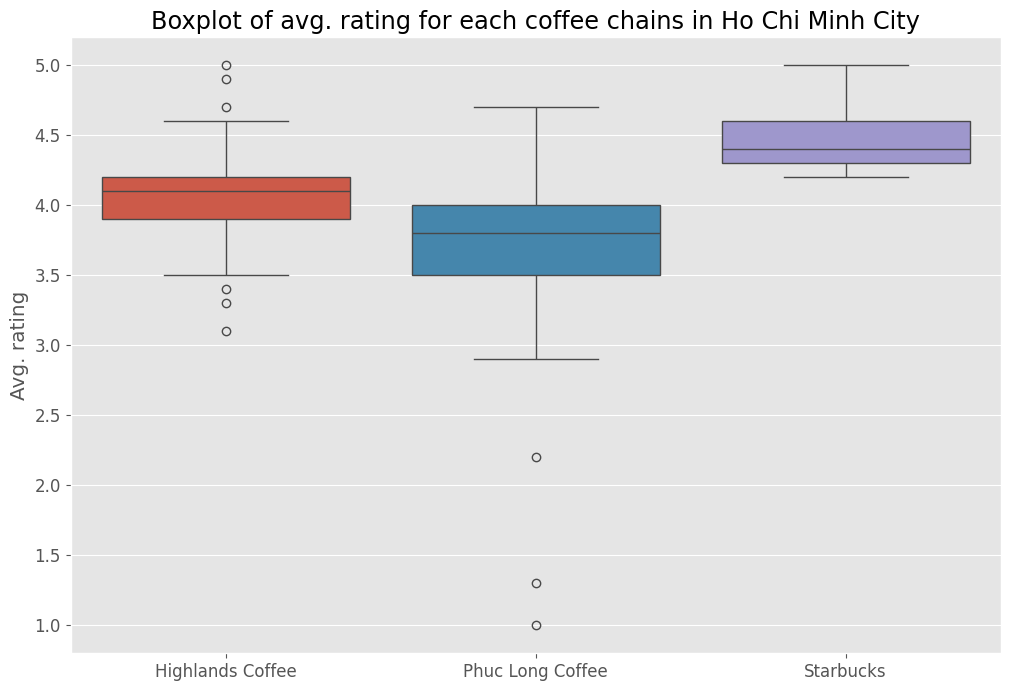

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

city = "Ho+Chi+Minh+City"

box_df = []
for chain in coffee_chains:
    key = f"{chain}_{city}"

    box_df.append(dfs[key].copy())
    box_df[-1]["chain"] = chain.replace("+", " ")

box_df = pd.concat(box_df).melt(
    id_vars=["chain"],
    value_vars=["avg_rating"],
    value_name="Avg. rating",
)

plt.figure(figsize=(12, 8))

sns.boxplot(data=box_df, x="chain", y="Avg. rating", hue="chain")

plt.title("Boxplot of avg. rating for each coffee chains in Ho Chi Minh City")

plt.xlabel("")

plt.show()